In [1]:
import pandas as pd
import datetime
import numpy as np
import math

import plotly.offline as py 
import plotly.graph_objs as go 

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

import seaborn as sns

In [2]:
file_url="covid_19_data.csv"

df=pd.read_csv(file_url)

In [3]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2105,2106,02/22/2020,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
2106,2107,02/22/2020,"Sacramento County, CA",US,2020-02-21T23:13:16,1.0,0.0,0.0
2107,2108,02/22/2020,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
2108,2109,02/22/2020,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0
2109,2110,02/22/2020,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0


In [4]:
countries_list=df['Country/Region'].unique()

countries_list

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon'], dtype=object)

In [92]:
corona_study={}
corona_average_daily_growth={}

for country in countries_list:
    df_country=df[df['Country/Region']==country]
    
    df_country_by_date=df_country.groupby(['ObservationDate']).sum()
    
    corona_study[country]={}
    corona_study[country]['confirmed']=df_country_by_date['Confirmed'].max()
    corona_study[country]['death']=df_country_by_date['Deaths'].max()
    corona_study[country]['recovered']=df_country_by_date['Recovered'].max()
    
    confirmed_series=list(df_country_by_date['Confirmed'])
    corona_average_daily_growth[country]=np.mean(np.diff(confirmed_series))

C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



In [93]:
corona_study['China'] = corona_study.pop('Mainland China')
corona_study['United States of America'] = corona_study.pop('US')
corona_study['United Kingdom'] = corona_study.pop('UK')

corona_average_daily_growth['China'] = corona_average_daily_growth.pop('Mainland China')
corona_average_daily_growth['United States of America'] = corona_average_daily_growth.pop('US')
corona_average_daily_growth['United Kingdom'] = corona_average_daily_growth.pop('UK')

In [94]:
corona_study

{'Hong Kong': {'confirmed': 69.0, 'death': 2.0, 'recovered': 6.0},
 'Macau': {'confirmed': 10.0, 'death': 0.0, 'recovered': 6.0},
 'Taiwan': {'confirmed': 26.0, 'death': 1.0, 'recovered': 2.0},
 'Japan': {'confirmed': 122.0, 'death': 1.0, 'recovered': 22.0},
 'Thailand': {'confirmed': 35.0, 'death': 0.0, 'recovered': 17.0},
 'South Korea': {'confirmed': 433.0, 'death': 2.0, 'recovered': 16.0},
 'Singapore': {'confirmed': 85.0, 'death': 0.0, 'recovered': 37.0},
 'Philippines': {'confirmed': 3.0, 'death': 1.0, 'recovered': 1.0},
 'Malaysia': {'confirmed': 22.0, 'death': 0.0, 'recovered': 15.0},
 'Vietnam': {'confirmed': 16.0, 'death': 0.0, 'recovered': 14.0},
 'Australia': {'confirmed': 22.0, 'death': 0.0, 'recovered': 11.0},
 'Mexico': {'confirmed': 0.0, 'death': 0.0, 'recovered': 0.0},
 'Brazil': {'confirmed': 0.0, 'death': 0.0, 'recovered': 0.0},
 'Colombia': {'confirmed': 0.0, 'death': 0.0, 'recovered': 0.0},
 'France': {'confirmed': 12.0, 'death': 1.0, 'recovered': 4.0},
 'Nepal': {

In [95]:
corona_average_daily_growth

{'Hong Kong': 2.225806451612903,
 'Macau': 0.2903225806451613,
 'Taiwan': 0.8064516129032258,
 'Japan': 3.870967741935484,
 'Thailand': 1.064516129032258,
 'South Korea': 13.935483870967742,
 'Singapore': 2.8,
 'Philippines': 0.125,
 'Malaysia': 0.7586206896551724,
 'Vietnam': 0.4666666666666667,
 'Australia': 0.7586206896551724,
 'Mexico': nan,
 'Brazil': nan,
 'Colombia': nan,
 'France': 0.3448275862068966,
 'Nepal': 0.0,
 'Canada': 0.2962962962962963,
 'Cambodia': 0.0,
 'Sri Lanka': 0.0,
 'Ivory Coast': nan,
 'Germany': 0.48,
 'Finland': 0.0,
 'United Arab Emirates': 0.375,
 'India': 0.08695652173913043,
 'Italy': 2.727272727272727,
 'Russia': 0.0,
 'Sweden': 0.0,
 'Spain': 0.047619047619047616,
 'Belgium': 0.0,
 'Others': 38.2,
 'Egypt': 0.0,
 'Iran': 8.666666666666666,
 'Israel': 0.0,
 'Lebanon': 0.0,
 'China': 2463.7096774193546,
 'United States of America': 1.096774193548387,
 'United Kingdom': 0.3181818181818182}

In [96]:
import geopandas as  gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['confirmed'] = 0
world['death'] = 0
world['recovered'] = 0
world['daily_growth']=0

In [106]:
for country,row in corona_study.items():
    if (len(world.loc[world['name'] == country])>0):
        country_index=world.loc[world['name'] == country].index[0]
        world.at[country_index,'confirmed']=math.log(corona_study[country]['confirmed']+1)
        world.at[country_index,'death']=math.log(corona_study[country]['death']+1)
        world.at[country_index,'recovered']=math.log(corona_study[country]['recovered']+1)
        if (not math.isnan(corona_average_daily_growth[country])):
            world.at[country_index,'daily_growth']=math.log(corona_average_daily_growth[country]+1)
    else:
        print(country)

Hong Kong
Macau
Singapore
Ivory Coast
Others


In [107]:
world['death_rate']=world['death']/world['confirmed']
world['recovered_rate']=world['recovered']/world['confirmed']

Text(0.5, 1.0, 'Visualization of Confirmed case map')

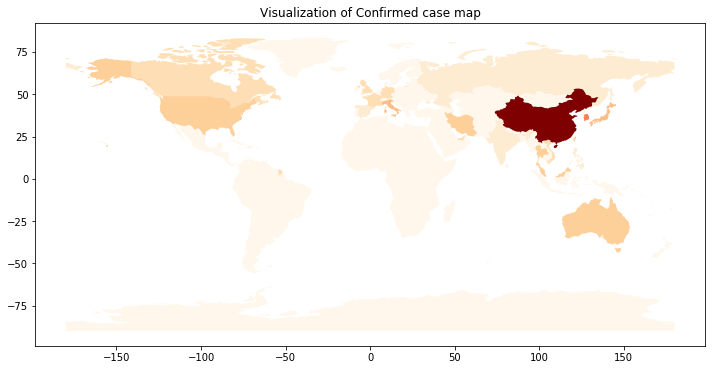

In [118]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='confirmed', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Confirmed case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Death case map')

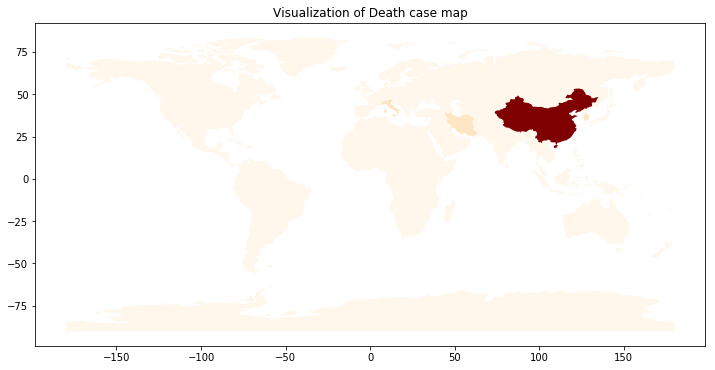

In [120]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Death case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Recovered case map')

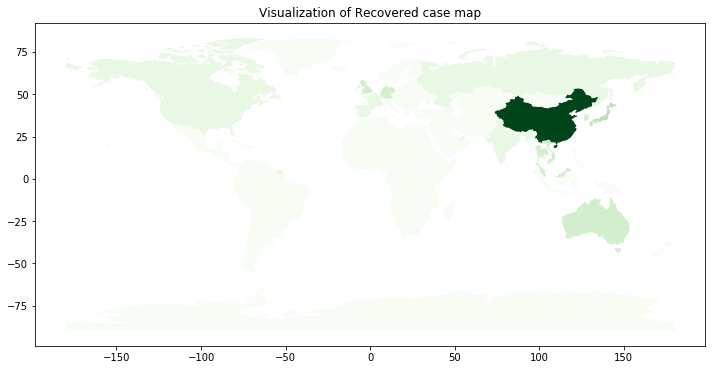

In [121]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Recovered case map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



Text(0.5, 1.0, 'Visualization of death rate map')

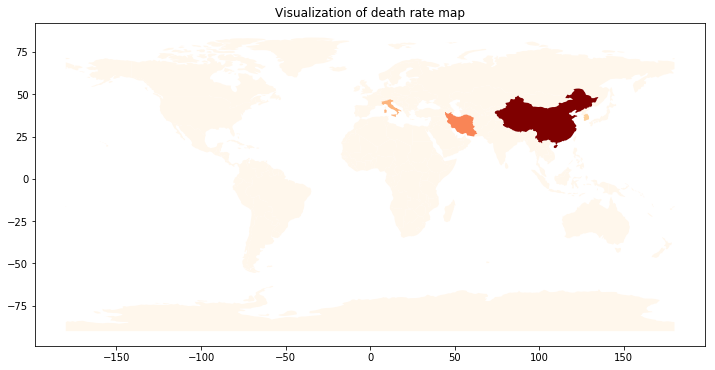

In [122]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death_rate', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of death rate map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



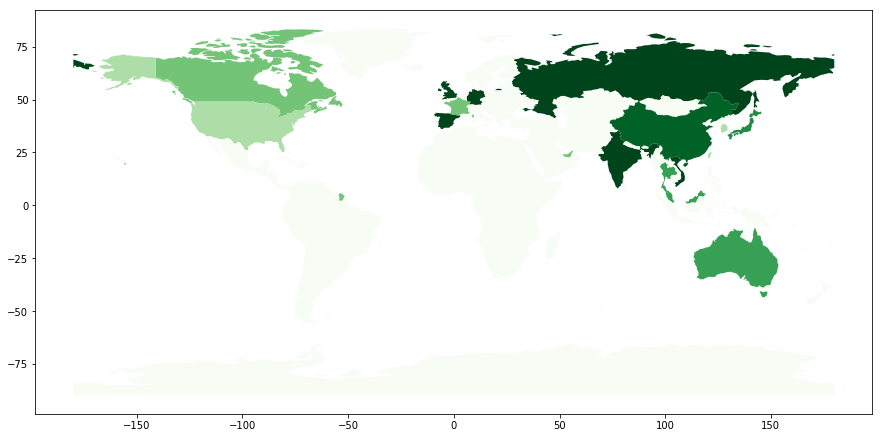

In [112]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered_rate', cmap='Greens',figsize=(15, 10));
ax.set_title("Visualization of recover rate map", fontsize=12)

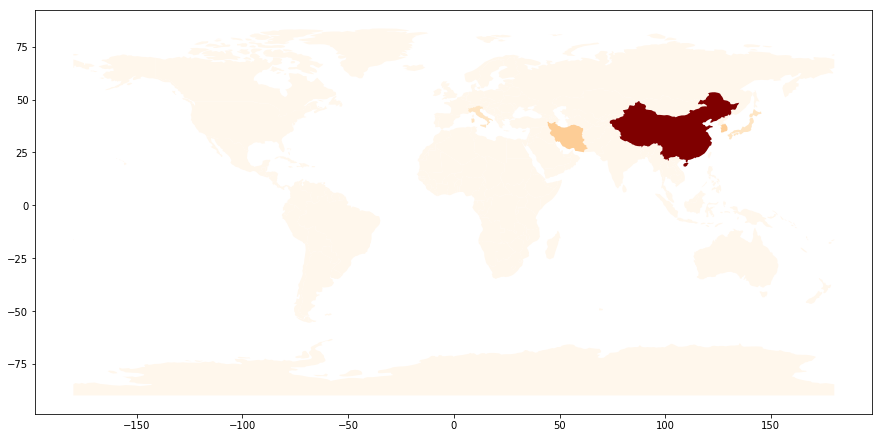

In [113]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='daily_growth', cmap='OrRd',figsize=(15, 10));